In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams["patch.force_edgecolor"] = True


### Customer EDA

In [3]:
users = pd.read_csv('../data/customers.csv')

print("Shape:")
print(users.shape)

print("---")
users.info()

Shape:
(1371980, 7)
---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [4]:
users.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [5]:
users.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

#### Categorical features

In [6]:
users.FN.unique() # nan could be encoded as 0; FN = Fashion news

array([nan,  1.])

In [7]:
users.club_member_status.unique()

array(['ACTIVE', nan, 'PRE-CREATE', 'LEFT CLUB'], dtype=object)

In [8]:
users.fashion_news_frequency.unique()

array(['NONE', 'Regularly', nan, 'Monthly', 'None'], dtype=object)

Age stats:
mean      36.386965
median    32.000000
min       16.000000
max       99.000000
std       14.313628
Name: age, dtype: float64



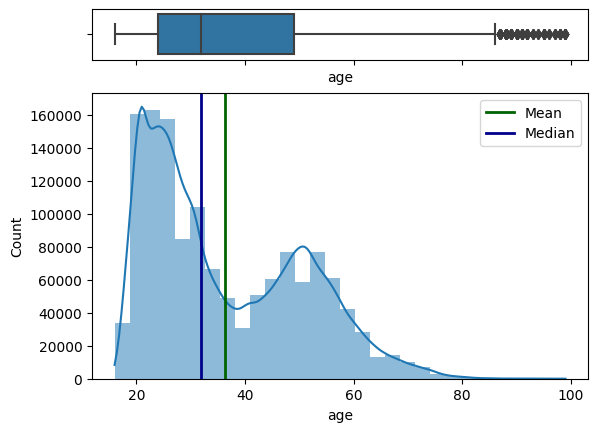

In [9]:
print("Age stats:")

stat = users.age.agg(['mean', 'median', 'min', 'max', 'std'])
print(stat)
print()

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(x=users.age, ax=ax_box)
sns.histplot(users.age, bins=30, linewidth=0, kde=True, ax = ax_hist)

ax_hist.axvline(stat['mean'], color = 'darkgreen',linewidth=2,label = 'Mean')
ax_hist.axvline(stat['median'], color = 'darkblue',linewidth=2,label = 'Median')
plt.legend(loc='upper right')

plt.show()

In [10]:
users[users.age > 80]['age'].count()

1112

### Articles EDA

In [42]:
articles = pd.read_csv('../data/articles.csv')
print(articles.shape)
articles.info()

(105542, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null

In [41]:
groups = ['index_group_name', 'product_group_name']
pd.DataFrame(articles.groupby(groups)[groups].value_counts())

0
index_group_name product_group_name          
Baby/Children    Accessories             2927
                 Bags                       2
                 Cosmetic                  49
                 Fun                        2
                 Garment Full body       4823
                 Garment Lower body      7371
                 Garment Upper body     13178
                 Interior textile           3
                 Nightwear               1119
                 Shoes                   2239
                 Socks & Tights          1266
                 Swimwear                 818
                 Underwear                851
                 Underwear/nightwear       54
                 Unknown                    9
Divided          Accessories             1463
                 Bags                      15
                 Garment Full body       2825
                 Garment Lower body      3182
                 Garment Upper body      6999
                 Shoes                    277
                 Socks & Tights            93
                 Swimwear                  76
                 Underwear                202
                 Unknown                   17
Ladieswear       Accessories             5211
                 Bags                       1
                 Furniture                 13
                 Garment Full body       5601
                 Garment Lower body      5742
                 Garment Upper body     14110
                 Garment and Shoe care      9
                 Items                     16
                 Nightwear                663
                 Shoes                   2093
                 Socks & Tights           578
                 Stationery                 5
                 Swimwear                1912
                 Underwear               3727
                 Unknown                   56
Menswear         Accessories             1392
                 Bags                       7
                 Garment Full body         11
                 Garment Lower body      2464
                 Garment Upper body      6855
                 Items                      1
                 Nightwear                117
                 Shoes                    672
                 Socks & Tights           362
                 Swimwear                 245
                 Underwear                399
                 Unknown                   28
Sport            Accessories              165
                 Garment Full body         32
                 Garment Lower body      1053
                 Garment Upper body      1599
                 Shoes                      2
                 Socks & Tights           143
                 Swimwear                  76
                 Underwear                311
                 Unknown                   11

In [13]:
articles.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

###

In [14]:
transactions = pd.read_csv('../data/transactions_train.csv')

In [15]:
transactions.shape

(31788324, 5)

In [16]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [17]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [18]:
transactions.customer_id.nunique()

1362281

In [19]:
transactions.sales_channel_id.unique()

array([2, 1])